In [ ]:
# xmlrpc_client.ipynb

import xmlrpc.client 
import pickle
import pandas as pd

server = xmlrpc.client.ServerProxy("http://localhost:8008")


print(server.system.listMethods())
print('Ping:', server.ping())
print ('Server datetime:', server.now())


In [ ]:
print('View, type, value:', server.type(2))
print('View, type, value:', server.type(2.))
print('View, type, value:', server.type('My string'))
print('View, type, value:', server.type("My string"))
print('View, type, value:', server.type([1,2,3]))
print('View, type, value:', server.type(["one", "two", "three"]))
print('View, type, value:', server.type((1,2,"3")))

print('Sum 2 + 3 :', server.sum(2, 3))
print('Pow 2^3: ', server.pow(2, 3))

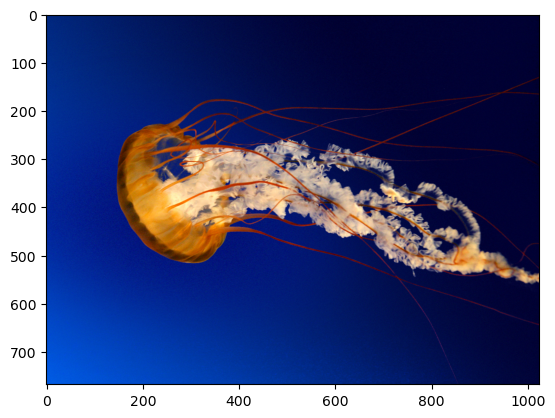

In [3]:
from PIL import Image # Работа с изображением
from pylab import * # Отображение

import xmlrpc.client

# Режим отображения внутри ноутбука
%matplotlib inline
gray()

img = Image.open('Jellyfish.jpg')

img_arr = array(img)

# Исходное изображение
imshow(img_arr)

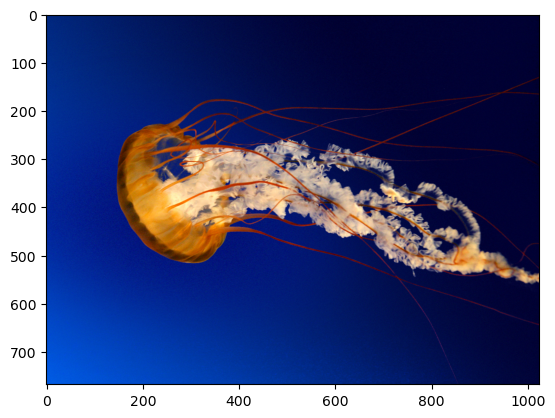

In [4]:
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = xmlrpc.client.Binary(pimg)

img_bin2 = server.send_back_binary(img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возврата с сервера
imshow(img_arr2)

In [5]:

# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpc.client.Binary(pimg)
    
    img_bin2 = server.color_inversion(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_inv)

KeyboardInterrupt: 

In [ ]:
# Бинаризация изображения через сервер
def bin_im(img_arr_b):
    pimg = pickle.dumps(img_arr_b)
    img_bin = xmlrpc.client.Binary(pimg)
    
    img_bin2 = server.bin_i(img_bin, 100)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_bn = bin_im(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_bn)

In [ ]:
#  Вертикальный разворот изображения через сервер
def turn_v(img_arr_turn):
    pimg = pickle.dumps(img_arr_turn)
    img_bin = xmlrpc.client.Binary(pimg)
    
    img_bin2 = server.vertical_turn(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_turnv = turn_v(img_arr)

# Изображение с разворотом
imshow(img_arr_turnv)

In [ ]:
# Режим отображения внутри ноутбука
%matplotlib inline

img2 = Image.open('11.bmp')

img2_arr = array(img2)

# Исходное изображение
#imshow(img2_arr, cmap = "gray")
imshow(img2_arr)

In [ ]:
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg2 = pickle.dumps(img2_arr) # универсально

img2_bin = xmlrpc.client.Binary(pimg2)

img2_bin2 = server.send_back_binary(img2_bin)

#img_arr2 = np.loads(img_bin2.data)
img2_arr2 = pickle.loads(img2_bin2.data) # универсально

# Изображение после возврата с сервера
imshow(img2_arr2, cmap = "gray")

In [ ]:
# Инверсия монохромного изображения через сервер
def inv_color(img_2arr_in):
    pimg2 = pickle.dumps(img_2arr_in)
    img2_bin = xmlrpc.client.Binary(pimg2)
    
    img2_bin2 = server.color_inversion(img2_bin)
    
    img2_arr_out = pickle.loads(img2_bin2.data)
    return img2_arr_out

img2_arr_inv = inv_color(img2_arr)

# Монохромное изображение с инверсией цвета
imshow(img2_arr_inv, cmap = "gray")

In [ ]:
# Бинаризация изображения через сервер
def bin_im(img_2arr_b):
    pimg = pickle.dumps(img_2arr_b)
    img2_bin = xmlrpc.client.Binary(pimg)
    
    img2_bin2 = server.bin_i(img2_bin, 125)
    
    img2_arr_out = pickle.loads(img2_bin2.data)
    return img2_arr_out

img2_arr_bn = bin_im(img2_arr)

# Изображение c бинаризацией
imshow(img2_arr_bn, cmap = "gray")

In [ ]:
print(server.black_list_check('Петров','Петр','Петрович','07.08.1985'))
print(server.black_list_check('Примеров','Василий','Иванович','05.09.2000'))
print(server.black_list_check('Петров','Иван','Петрович','07.08.1985'))


In [ ]:
#  Вертикальный разворот изображения через сервер
def turn_v(img_2arr_turn):
    pimg = pickle.dumps(img_2arr_turn)
    img2_bin = xmlrpc.client.Binary(pimg)
    
    img2_bin2 = server.vertical_turn(img2_bin)
    
    img2_arr_out = pickle.loads(img2_bin2.data)
    return img2_arr_out

img2_arr_turnv = turn_v(img2_arr)

# Изображение с разворотом
imshow(img2_arr_turnv, cmap = "gray")

In [6]:
log_server = xmlrpc.client.ServerProxy("http://localhost:8018")
print("log: ", log_server.get_log('2020-01-01 00:00:00', '2023-01-01 00:00:00', 'ping'), "\n")
print("log: ", log_server.get_log('2020-01-01 00:00:00', '2023-01-01 00:00:00'), "\n")
print("log: ", log_server.get_log_event('now'))

log:  ['2022-09-16 15:05:31,ping', '2022-09-16 15:20:00,ping', '2022-09-16 15:24:54,ping', '2022-09-16 15:31:25,ping', '2022-09-16 15:37:49,ping', '2022-09-16 15:45:59,ping', '2022-09-16 15:52:38,ping', '2022-09-16 15:57:52,ping', '2022-09-16 16:06:11,ping'] 

log:  ['2022-09-16 15:05:31,ping', '2022-09-16 15:05:35,now', '2022-09-16 15:05:39,type', '2022-09-16 15:05:43,type', '2022-09-16 15:05:47,type', '2022-09-16 15:05:51,type', '2022-09-16 15:05:55,type', '2022-09-16 15:06:00,type', '2022-09-16 15:06:04,type', '2022-09-16 15:06:08,sum', '2022-09-16 15:06:12,pow', '2022-09-16 15:20:00,ping', '2022-09-16 15:20:04,now', '2022-09-16 15:20:09,type', '2022-09-16 15:20:13,type', '2022-09-16 15:20:17,type', '2022-09-16 15:20:21,type', '2022-09-16 15:20:25,type', '2022-09-16 15:20:29,type', '2022-09-16 15:20:33,type', '2022-09-16 15:20:37,sum', '2022-09-16 15:20:41,pow', '2022-09-16 15:24:54,ping', '2022-09-16 15:24:58,now', '2022-09-16 15:25:02,type', '2022-09-16 15:25:06,type', '2022-09-16